# Data wrangling project 
   By Soumia Zohra El Mestari  <br>
 
 
**DataSet description :** <br> 
"WeRateDogs" from Twitter 

In [2]:
# import all the necessary libraries 
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import warnings
from tweepy import OAuthHandler
from timeit import default_timer as timer

##  First Step : Gathering data 

In [3]:
#Read twitter archive in a dataFrame

tArchive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
#Load the image predictions tsv file from Udacity's server 
data_url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(data_url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read these data in a dataFrame    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [ ]:
# Gather data using Twitter API and save them into a Json File 
consumer_key = '*******'
consumer_secret = '******'
access_token = '******'
access_secret = '*****'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_ids = tArchive_df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            passend = timer()
print(end - start)
print(fails_dict)

In [5]:
# Now read the loaded tweets into a dataFrame 
tweets_list = []
# For loop to append each tweet into a list "teweets_list"
tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
 
        tweets_list.append(tweet)
    except:
        continue
        
tweet_file.close()

# The dataFrame 
tweet_info_df = pd.DataFrame()
# Add those tweets in the tweet_info_df 
tweet_info_df['tweetId'] = list(map(lambda tweet: tweet['id'], tweets_list))
tweet_info_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))
tweet_info_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))

## Second Step : Data assesing 

In [6]:
# we start with the first 5 rows in the Twitter archive dataframe
tArchive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# and the Last five rows in the Twitter archive dataframe 
tArchive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
tArchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
tArchive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# check for misespelled values that can lead to duplicates 
tArchive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
tArchive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Toby          7
Daisy         7
Bailey        7
Buddy         7
Koda          6
Oscar         6
Rusty         6
Stanley       6
Jax           6
Dave          6
Leo           6
Jack          6
Milo          6
Scout         6
Bella         6
Phil          5
           ... 
Chevy         1
Ike           1
Dietrich      1
Sid           1
Colin         1
Jerome        1
Lacy          1
Crumpet       1
Kota          1
Tobi          1
Tuck          1
Kenzie        1
Duddles       1
Lance         1
Grady         1
Timofy        1
Rover         1
Akumi         1
Jarvis        1
Aqua          1
Sora          1
Cilantro      1
Brownie       1
Richie        1
Cheryl        1
Tassy         1
Fido          1
Jersey        1
Margo         1
Tedders       1
Name: name, Length: 957,

> Names like a Mo , O seems to be innacurate let's take a look at these rows 

In [13]:
tArchive_df[tArchive_df.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


> Now if we take a look at the text of this row we can see that the actual name is O'Malley and not 'O' 

In [14]:
tArchive_df[tArchive_df.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


> All rows that have as a name 'a' is actually a wrong value , this errors may have occurred from poor strategy of formatting the text column to extract the name 

In [12]:
tArchive_df[tArchive_df.name == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


> As a result all names starting with lower case are wrong names values because they are parts of the sentence and not names 

In [15]:
tArchive_df[tArchive_df.text.str.contains("&",na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None


> &amp and other html formatting in the text 

In [13]:
# we explore the issues with image_predictions_df  
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# now let's move to tweet_info_df
tweet_info_df.head()

,tweetId,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
tweet_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweetId           2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
tweet_info_df.describe()

,tweetId,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Documenting the found issues 

#### Quality :

- Indetected missing values in name and dog stages fill in with 'None' 
- Missing values in the following columns : 'in_reply_to_status_id' , 'in_reply_to_user_id','retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' and 'expanded_urls' **Nothing can be done for these missing values**
- 'Source' as an html link tag => needs reformatting to extract only the source 
- Wrong names values  ( names that starts with lower case) 
- timestamp in tArchive_df should be  of date type not a string 
- We have 2356 tweet in the archive and only 2354 in the info dataFrame => missing informations for two rows .
- Reply_status_id and other ids as float64 when they should be of string type because ids may exceed the limit of int type .
- The dataSet contains retweets . 
- Html entities in text column such as : &amp needs to be removed.
- Source should be of type Category instead of String ( object in pandas ) 


#### Tidiness : 
- Dog stage values in four columns where each variable should be in a column .
- Join tweets informations , image predictions to twitter Archive

## Third Step : Data cleaning 

### 1- clean data tidiness issues :

In [32]:
# create copies of dataframes 
tArchive_df_clean = tArchive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_info_df_clean = tweet_info_df.copy()

#### Problem : Dog stage values in four columns : 

##### Define :
The variable Dog stage should have one column that contains one of the four possible values : doggo	,floofer,	pupper,	puppo => we need to Create dog stage variable and remove individual dog stage columns.

##### Code:

In [33]:
# create dog stage varible and fill it with the right value from text 
# Here I extracted one value only to keep the values of my column atomic 
# To satisfy the tidy data requirements In my opinion a tweet in this context 
# should be about one dog to treat the issue of having more than one dog in each 
# tweet maybe duplicating the entree is a solution for that and extracting 
# the relevant informations for each one .
tArchive_df_clean['dog_stage'] = tArchive_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [34]:
# Drop the individual stage values columns 
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
tArchive_df_clean = tArchive_df_clean.drop(columns_to_drop, axis=1)

##### test :

In [10]:
tArchive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [11]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


> So now we have one column for dogs stages but still we suffer from missing values for this variable 

#### Problem : Join tweets informations , image predictions to twitter archive : 

##### Define : 
add image predictions and tweets informations to twitter archive 

##### Code  : 

In [35]:
# we merge tArchive with tweets informations 
tArchive_df_clean = pd.merge(left = tArchive_df_clean, right = tweet_info_df_clean, left_on='tweet_id', right_on='tweetId', how='inner')

In [36]:
# we merge tArchive with image predictions 
tArchive_df_clean = pd.merge(left = tArchive_df_clean,right=image_predictions_df_clean, on='tweet_id', how='inner')

In [37]:
# we remove the duplicate tweetId 
tArchive_df_clean = tArchive_df_clean.drop('tweetId', axis=1)

##### test : 

In [38]:
# we will have a big number of columns (28 column) so if we try to display them 
# columns will be collapsed so the best choice is using pandas .info() method 
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     337 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non

### 2- clean data quality issues :

#### Problem : having retweets in the dataset  : 

##### Define :
Keep only the rows that are not retweets 

##### Code:

In [39]:
tArchive_df_clean = tArchive_df_clean[tArchive_df_clean['retweeted_status_id'].isnull()]

##### Test:

In [17]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_stage                     326 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-nu

##### Define : 
Remove retweet columns.

##### Code :

In [40]:
columns_to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tArchive_df_clean = tArchive_df_clean.drop(columns_to_drop, axis=1)

##### Test:

In [19]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

#### Problem : id columns have wrong data types 

##### Define :
Convert the following variables "tweet_id" ,"in_reply_to_status_id" and "in_reply_to_user_id" to String .

##### Code :

In [41]:
tArchive_df_clean['tweet_id'] = tArchive_df_clean['tweet_id'].astype(str)
tArchive_df_clean['in_reply_to_status_id'] = tArchive_df_clean['in_reply_to_status_id'].astype(str)
tArchive_df_clean['in_reply_to_user_id'] = tArchive_df_clean['in_reply_to_user_id'].astype(str)

##### Test :

In [42]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1

#### Problem : Source as an html tag  :

##### Define :
Extract the source from the html tag for the Source column

##### Code :

In [43]:
# this is to take a closer look on the content of the Source 
tArchive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [44]:
def setSource(row ):
    """
    This function extract the right source from the <a> tag 
    INPUT : 
        row : dataFrame row 
    OUTPUT:
       The true source (content of <a> tag)
    """
    a = row.source.find("\">")+2
    b = row.source.find("</a>")
    return row.source[a:b]

In [45]:
# set the right Source value for each row in the dataFrame
tArchive_df_clean.source = tArchive_df_clean.apply(lambda row: setSource(row ), axis=1)

##### Test :

In [46]:
tArchive_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Problem : Wrong type for source variable :

##### Define:
Set the source column type to be Category instead of object ( string )

##### Code :

In [47]:
tArchive_df_clean['source'] = tArchive_df_clean['source'].astype('category')

##### Test :

In [48]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null object
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                 

#### Problem : Wrong name values :

#### Define :
Names which start with lowercase are wrong => extract the right onces from the respective text column 

In [49]:
# First let's see what are these wrong values 
tArchive_df_clean[tArchive_df_clean.name.str.istitle() == False].name.value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
CeCe             2
getting          2
not              1
unacceptable     1
by               1
this             1
officially       1
all              1
space            1
actually         1
incredibly       1
his              1
light            1
DayZ             1
infuriating      1
such             1
my               1
BeBe             1
JD               1
DonDon           1
Name: name, dtype: int64

Because pandas collapses the text content I opened the file Using google sheet 
in order to analyse the right position of name for every missing value . <br>
 - Some of these tweets are not for dogs ( tacos , carrot ...) => these should be removed .
 - In others the right name can be found after word "named" or "his name is"
 

##### Define : 
For all rows that have as a name in lowercase intirely : <br>
1- Remove all the rows which their respective text contains one of the following values : carrot , T-Rex , taco , panda , giraffe , bear , cow, lobsters, Seal,Kangaroo , lion<br>
2- Extract the right name of some rows in which the text contains "named ..." or "his name is ..." <br>
4- Exract real names also when the name value is 'None' <br>

##### Code :

In [50]:
# 1 remove the tweets that are not for dogs 
items = ['carrot','T-Rex','taco','giraffe','bear','panda','cow','lobsters','Seal','Kangaroo' , 'lion']
for item in items :
    tArchive_df_clean = tArchive_df_clean[tArchive_df_clean.text.str.contains(item) == False]

# Extract right names for the other rows 
tArchive_df_clean[tArchive_df_clean.name.str.istitle() == False].name.value_counts()

a               47
the              6
an               4
one              4
just             3
very             2
CeCe             2
getting          2
quite            2
incredibly       1
unacceptable     1
by               1
this             1
officially       1
all              1
space            1
light            1
his              1
DayZ             1
infuriating      1
such             1
my               1
BeBe             1
JD               1
not              1
DonDon           1
Name: name, dtype: int64

In [51]:
# 2 extract the real names
for index, row in tArchive_df_clean.iterrows():
    if(row[9].istitle() == False):
        real_name = row[9]
        list_of_words = row[5].split()
        if(row[5].find("named") >= 0):
            real_name = list_of_words[list_of_words.index("named") + 1]
            
        elif (row[5].find("his name is") >= 0): 
            real_name = list_of_words[list_of_words.index("his name is") + 1]
        elif (row[5].find("His name is") >= 0): 
            real_name = list_of_words[list_of_words.index("His name is") + 1]        
        row[9] = real_name
        tArchive_df_clean.at[index,'name'] = real_name
     

In [52]:
# Exrract real name from Text when the name contains None
for index, row in tArchive_df_clean.iterrows():
    if(row[9] == 'None'):
        real_name = row[9]
        list_of_words = row[5].split()
        if("named" in list_of_words):
            real_name = list_of_words[list_of_words.index("named") + 1]
            
        elif ("his name is" in list_of_words): 
            real_name = list_of_words[list_of_words.index("his name is") + 1]
        elif ("His name is" in list_of_words): 
            real_name = list_of_words[list_of_words.index("His name is") + 1]        
        row[9] = real_name
        tArchive_df_clean.at[index,'name'] = real_name

##### Test :

In [53]:
tArchive_df_clean[tArchive_df_clean.name.str.istitle() == False].name.value_counts()

a               28
the              6
one              4
just             3
an               3
very             2
CeCe             2
getting          2
quite            2
incredibly       1
unacceptable     1
by               1
this             1
officially       1
all              1
space            1
light            1
his              1
DayZ             1
infuriating      1
such             1
my               1
BeBe             1
JD               1
not              1
DonDon           1
Name: name, dtype: int64

#### Problem : remain names starting with  lower case along with names that have as a value 'None' are actually missing name values 

##### Define :
Change all remaining names that start with a lowercase and those having as a value 'None' to NaN. <br> 

##### Code :

In [54]:
values_to_replace = ['None','a','the','one','just','an','quite','very',
                     'getting','such','this','my','incredibly','infuriating',
                     'all','officially','unacceptable','by','not','space',
                     'his','light']

for value in values_to_replace:
    tArchive_df_clean.name = tArchive_df_clean['name'].replace(value, np.NaN)

##### Test : 

In [55]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1954 non-null object
in_reply_to_status_id    1954 non-null object
in_reply_to_user_id      1954 non-null object
timestamp                1954 non-null object
source                   1954 non-null category
text                     1954 non-null object
expanded_urls            1954 non-null object
rating_numerator         1954 non-null int64
rating_denominator       1954 non-null int64
name                     1358 non-null object
dog_stage                325 non-null object
retweet_count            1954 non-null int64
favorite_count           1954 non-null int64
jpg_url                  1954 non-null object
img_num                  1954 non-null int64
p1                       1954 non-null object
p1_conf                  1954 non-null float64
p1_dog                   1954 non-null bool
p2                       1954 non-null object
p2_conf                 

> Now missing values in name are detected

#### Problem : Indetected missing values in name and dog stages fill in with 'None'.

##### Define :
 For dog_stage column change 'None' to Nan 

##### Code : 


In [56]:
tArchive_df_clean.dog_stage = tArchive_df_clean['dog_stage'].replace('None', np.NaN)

##### Test :

In [117]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1954 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1954 non-null object
source                   1954 non-null category
text                     1954 non-null object
expanded_urls            1954 non-null object
rating_numerator         1954 non-null int64
rating_denominator       1954 non-null int64
name                     1358 non-null object
dog_stage                325 non-null object
retweet_count            1954 non-null int64
favorite_count           1954 non-null int64
jpg_url                  1954 non-null object
img_num                  1954 non-null int64
p1                       1954 non-null object
p1_conf                  1954 non-null float64
p1_dog                   1954 non-null bool
p2                       1954 non-null object
p2_conf                  19

#### Problem : timestamp in tArchive_df should be  of date type not a string

##### Define : 
change the type of timestamp to be datetime 

#### Code :

In [57]:
tArchive_df_clean['timestamp'] = pd.to_datetime(tArchive_df_clean['timestamp'])

##### Test : 

In [123]:
tArchive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1954 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1954 non-null datetime64[ns]
source                   1954 non-null category
text                     1954 non-null object
expanded_urls            1954 non-null object
rating_numerator         1954 non-null int64
rating_denominator       1954 non-null int64
name                     1358 non-null object
dog_stage                325 non-null object
retweet_count            1954 non-null int64
favorite_count           1954 non-null int64
jpg_url                  1954 non-null object
img_num                  1954 non-null int64
p1                       1954 non-null object
p1_conf                  1954 non-null float64
p1_dog                   1954 non-null bool
p2                       1954 non-null object
p2_conf            

#### Problem : Html entities in text column such as : &amp 

##### Define : 
Remove Html entities in text column such as : &amp .

##### Code : 

In [58]:
tArchive_df_clean.text = tArchive_df_clean.text.str.replace("&amp", " ")

##### Test :

In [59]:
tArchive_df_clean[tArchive_df_clean.text.str.find("&") >= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Fourth Step : Store cleaned data 

In [62]:
tArchive_df_clean.to_csv('twitter_archive_master.csv',index=False)

## Fifth step : Analyse 

In [63]:
#load cleaned data
df = pd.read_csv("twitter_archive_master.csv")


### The most common dog stage in this dataSet

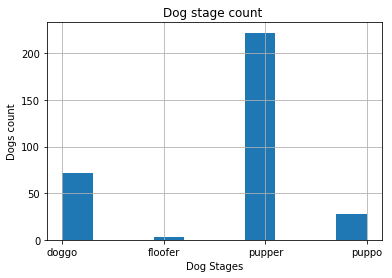

In [64]:
df.dog_stage.hist()
plt.xlabel('Dog Stages')
plt.ylabel('Dogs count')
plt.title('Dog stage count ')
plt.savefig('dog_stage.png')
plt.show()

> It can be stated that most of the dogs for which we have a stage value are Puppers  however and because we have a huge missing data for this variable we
can't say that puppers are the most common in this dataSet

### The rating ratio 

In [65]:
df['rating_ratio'] = df['rating_numerator'] / df['rating_denominator'] 

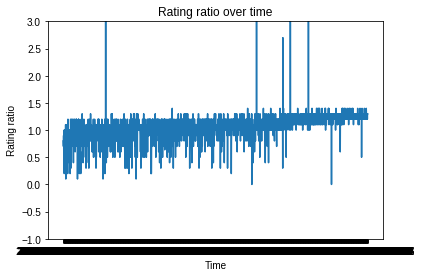

In [66]:
df.set_index('timestamp', inplace=True)
plt.plot(df['rating_ratio'])
plt.ylim(-1, 3)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Rating ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_Over_time.png')
plt.show()

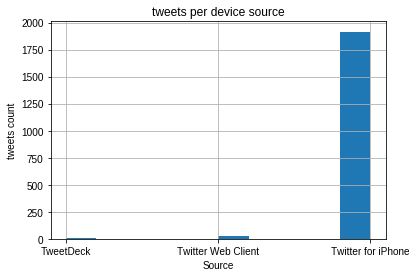

In [18]:
df['source'].hist();
plt.style.use('seaborn-darkgrid')
plt.xlabel('Source')
plt.ylabel('tweets count')
plt.title('tweets per device source')
plt.savefig('tweets_Per_device.png')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 25 columns):
Unnamed: 0               1954 non-null int64
tweet_id                 1954 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1954 non-null object
source                   1954 non-null object
text                     1954 non-null object
expanded_urls            1954 non-null object
rating_numerator         1954 non-null int64
rating_denominator       1954 non-null int64
name                     1358 non-null object
dog_stage                325 non-null object
retweet_count            1954 non-null int64
favorite_count           1954 non-null int64
jpg_url                  1954 non-null object
img_num                  1954 non-null int64
p1                       1954 non-null object
p1_conf                  1954 non-null float64
p1_dog                   1954 non-null bool
p2                       1954 

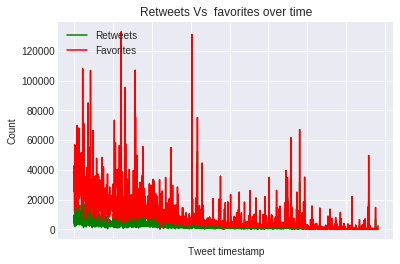

In [23]:
df['retweet_count'].plot(color = 'green', label='Retweets')
df['favorite_count'].plot(color = 'red', label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets Vs  favorites over time')
plt.savefig('retweetsVsFavourites.png')
plt.show()

To  get a closer look on the natures of the favourite and the most retweeted posts let's take a closer look at them 

In [67]:
df[df.favorite_count > df.favorite_count.quantile(0.99)] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-28 00:22:40,890729181411237888,NaN,NaN,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1.3
2017-07-19 00:47:34,887473957103951883,NaN,NaN,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,...,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,1.3
2017-07-12 00:01:00,884925521741709313,NaN,NaN,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,NaN,...,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True,1.2
2017-06-26 19:07:24,879415818425184262,NaN,NaN,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,...,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,1.3
2017-06-22 03:54:17,877736472329191424,NaN,NaN,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,NaN,...,Chesapeake_Bay_retriever,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True,1.3
2017-06-01 20:18:38,870374049280663552,NaN,NaN,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,...,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True,1.3
2017-05-22 00:28:40,866450705531457537,NaN,NaN,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,...,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,1.3
2017-05-10 00:08:34,862096992088072192,NaN,NaN,Twitter for iPhone,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,NaN,NaN,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,1.3
2017-02-12 01:04:29,830583320585068544,NaN,NaN,Twitter for iPhone,This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,...,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,1.3


In [68]:
df[df.retweet_count > df.retweet_count.quantile(0.99)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-26 19:07:24,879415818425184262,NaN,NaN,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,...,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,1.3
2017-06-01 20:18:38,870374049280663552,NaN,NaN,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,...,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True,1.3
2017-05-22 00:28:40,866450705531457537,NaN,NaN,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,...,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,1.3
2017-05-10 00:08:34,862096992088072192,NaN,NaN,Twitter for iPhone,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,NaN,NaN,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,1.3
2017-01-29 02:44:34,825535076884762624,NaN,NaN,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,NaN,puppo,...,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,1.4
2017-01-21 18:26:02,822872901745569793,NaN,NaN,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,...,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,1.3
2017-01-11 02:21:57,819006400881917954,NaN,NaN,Twitter for iPhone,This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,NaN,...,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False,1.4
2017-01-11 02:15:36,819004803107983360,NaN,NaN,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,NaN,...,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,1.4
2017-01-07 20:18:46,817827839487737858,NaN,NaN,Twitter for iPhone,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,NaN,...,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True,1.3
